In [1]:
import wordcloud
import numpy as np
import pandas as pd

import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from sklearn import metrics
from keras.utils import np_utils
#from keras.layers.core import Dense, Dropout, Activation, Lambda
from collections import defaultdict
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

In [3]:
data=pd.read_csv('Dataset.csv')
data.head()

,Unnamed: 0,studentAnswer,referenceAnswer,ref_1,ref_2,accuracy
0,0,By letting it sit in a dish for a day.,"The water was evaporated, leaving the salt.",We evaporated the salt from the water because ...,I put some water in a dish and let the water e...,incorrect
1,1,Let the water evaporate and the salt is left b...,"The water was evaporated, leaving the salt.",We evaporated the salt from the water because ...,I put some water in a dish and let the water e...,correct
2,2,The water evaporated and left salt crystals.,"The water was evaporated, leaving the salt.",We evaporated the salt from the water because ...,I put some water in a dish and let the water e...,correct
3,3,I saw a pinkish grayish color that was blockin...,"The water was evaporated, leaving the salt.",We evaporated the salt from the water because ...,I put some water in a dish and let the water e...,incorrect
4,4,You have to slowly tip the vial for only the w...,"The water was evaporated, leaving the salt.",We evaporated the salt from the water because ...,I put some water in a dish and let the water e...,incorrect


In [4]:
# 3shan ashil error l AttributeError: 'float' object has no attribute 'lower'
#data.SentimentText=data.SentimentText.astype(str)
data = data.dropna()
data.columns =['number','studentAnswer','referenceAnswer','ref_1','ref_2','accuracy',]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 0 to 4924
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           4925 non-null   int64 
 1   studentAnswer    4925 non-null   object
 2   referenceAnswer  4925 non-null   object
 3   ref_1            4925 non-null   object
 4   ref_2            4925 non-null   object
 5   accuracy         4925 non-null   object
dtypes: int64(1), object(5)
memory usage: 269.3+ KB


In [5]:
data['studentAnswer'].head()
print('\n')
data['studentAnswer'].count()

4925

In [8]:
stop_words = stopwords.words('english')

In [9]:
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [10]:
data['studentAnswer'] = data['studentAnswer'].apply(preprocess)

In [11]:
data['accuracy'].value_counts()

incorrect    2944
correct      1981
Name: accuracy, dtype: int64

In [12]:
data2 = data[["accuracy","studentAnswer"]]
data2.groupby('accuracy').describe()

studentAnswer         \
                  count unique   
accuracy                         
correct            1981    134   
incorrect          2944    134   

                                                                   
                                                         top freq  
accuracy                                                           
correct                                  rubber band vibrate   49  
incorrect  sammy different material would make different ...  104

# Training testing

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data['studentAnswer'], data['accuracy'], random_state=0,test_size = 0.25)

In [14]:
print(data['accuracy'].value_counts())

incorrect    2944
correct      1981
Name: accuracy, dtype: int64


In [15]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (3693,)
y_train shape: (3693,)

x_test shape: (1232,)
y_test shape: (1232,)



In [16]:
x_train


2864        think make solution eggshell bubble disappear
685     overly orange luscious lemon vitamin c take co...
2260                maybe greta big hand andre small hand
3935                   blue cover get hot amount time red
221                         salt crystal look like square
                              ...                        
4859    need throw place need one variable change coul...
3264                                      make doom sound
1653                             c square part round ball
2607                                    alum pattern look
2732                             high point concentration
Name: studentAnswer, Length: 3693, dtype: object

In [17]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<3693x556 sparse matrix of type '<class 'numpy.int64'>'
	with 16146 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Number of features: 556


In [19]:
print("Show some feature names : \n", vectorizer.get_feature_names()[::50])

Show some feature names : 
 ['able', 'brass', 'count', 'evaporation', 'gas', 'know', 'metal', 'parallel', 'room', 'solvent', 'think', 'wooden']


In [20]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [21]:
X_test = vectorizer.transform(x_test)

In [22]:
# Predicting the Test set results  
y_pred =mnb.predict(X_test)

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6988636363636364


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     correct       0.64      0.60      0.62       499
   incorrect       0.74      0.77      0.75       733

    accuracy                           0.70      1232
   macro avg       0.69      0.68      0.68      1232
weighted avg       0.70      0.70      0.70      1232



In [25]:
from sklearn.metrics import classification_report, confusion_matrix
ConfMat=confusion_matrix(y_test, y_pred)
print(ConfMat)

[[298 201]
 [170 563]]


[Text(0, 0.5, '1'), Text(0, 1.5, '2')]

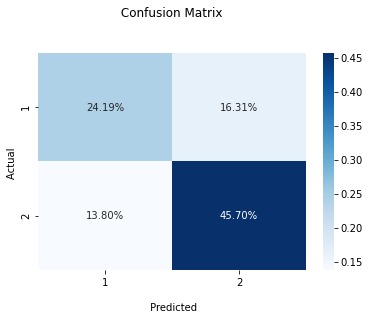

In [26]:
import seaborn as sns
ax = sns.heatmap(ConfMat/np.sum(ConfMat),fmt='.2%', annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix \n\n');
ax.set_xlabel('\n Predicted')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1', '2'])
ax.yaxis.set_ticklabels(['1', '2',])

## Display the visualization of the Confusion Matrix.
##plt.show()